<a href="https://colab.research.google.com/github/hjn14133/STAT/blob/main/Practical_STAT_EDA_Tokyo_Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
medal_count = pd.read_excel("Medals.xlsx")

In [3]:
medal_count.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


**Estimates of Locations**

In [6]:
# Estimates of Location - Mean
medal_count["Total"].mean()

11.612903225806452

In [10]:
# Weighted Mean

import numpy as np
np.average(medal_count["Total"], weights = medal_count["Gold"])

46.832352941176474

In [19]:
# Trimmed Mean - Outliers
from scipy.stats import trim_mean
trim_mean(medal_count["Total"], 0.1)

6.8933333333333335

(array([82.,  5.,  3.,  2.,  1.]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. ]),
 <a list of 5 Patch objects>)

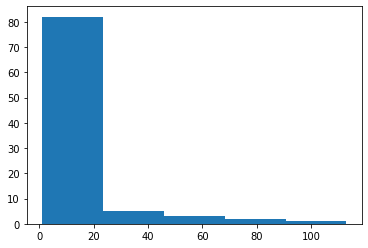

In [20]:
import matplotlib.pyplot as plt

plt.hist(medal_count["Total"], bins = 5)

In [21]:
# Median - Robuster than Mean - great with skewed data / Weighted Median 

medal_count["Total"].median()

4.0

In [28]:
# Percentile

q3 = np.percentile(medal_count["Total"], 75)
q3

11.0

In [22]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


**Estimates of Variability (Dispersion Metrics)**

In [29]:
# Estimates of Variability (Dispersion Metrics)
# Variance
from statistics import variance

variance(medal_count["Gold"])

49.315100514259

In [30]:
# Standard Deviation
from statistics import stdev

stdev(medal_count["Gold"])

7.022471111671376

In [32]:
# Median Absolute Deviation - robust against outliers
from numpy import median, absolute

median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [34]:
# Interquartile Range

q3, q1 = np.percentile(medal_count["Gold"], [75, 25])
iqr = q3 - q1

iqr

3.0

**Exploring the Data Distribution**

In [ ]:
# Percentiles (summarize the tails of a distribution as top 1%) 
# Boxplots - gives specific 

pd.Series.quantile([0.05, 0.25, 0.5, 0.75, 0.95])

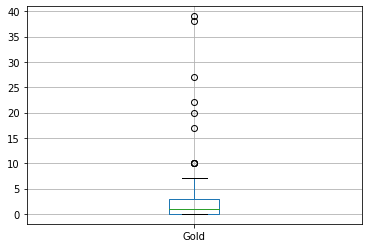

In [35]:
# Boxplots - lots of outliers
medal_count.boxplot(column="Gold")

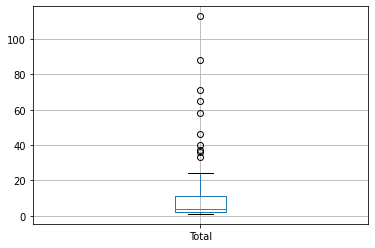

In [36]:
# Boxplots - lots of outliers
medal_count.boxplot(column="Total")

In [38]:
# Frequency Table

frequency_table = medal_count.copy()

frequency_table["freq"] = pd.cut(medal_count["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <a list of 30 Patch objects>)

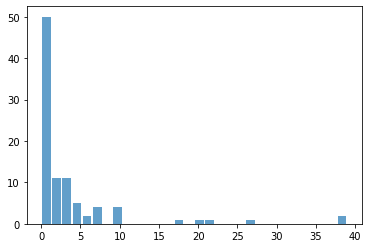

In [43]:
plt.hist(x = medal_count["Gold"], bins = 'auto', alpha = 0.7, rwidth = 0.85)

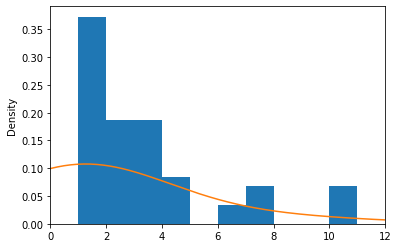

In [45]:
# Density Plots and Estimates

ax = medal_count["Gold"].plot.hist(density = True,
                                   xlim = [0, 12], 
                                   bins = range(1, 12))
medal_count["Gold"].plot.density(ax = ax)

**Exploring the Binary and Categorical Data**

Text(0.5, 0, 'Country')

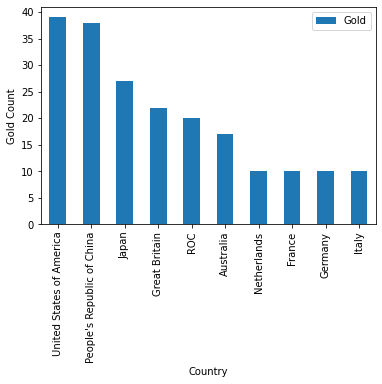

In [49]:
# Bar Plots
ax = medal_count.iloc[:10, :].plot. bar(x = "Team/NOC", y = "Gold")
ax.set_ylabel("Gold Count")
ax.set_xlabel("Country")

([<matplotlib.patches.Wedge at 0x7fe6f1a0a990>,
 [Text(0.835472805245981, 0.7155314051070094, 'United States of America'),
  Text(-0.5614922419634689, 0.9458998161617527, "People's Republic of China"),
  Text(-1.0884125938512774, -0.15924203448189894, 'Japan'),
  Text(-0.5614922419634693, -0.9458998161617526, 'Great Britain'),
  Text(0.24755427095562205, -1.0717821060885606, 'ROC'),
  Text(0.8609034913566292, -0.6847227019531091, 'Australia'),
  Text(1.081912579432137, -0.19865842661840447, 'Netherlands')])

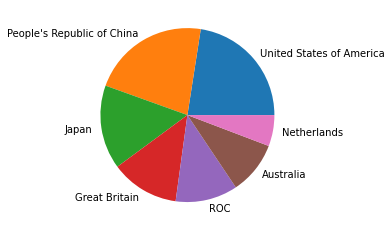

In [58]:
# Pie Chart (proportions) - NoT Generally Recommand

plt.pie(medal_count.iloc[:7, :]["Gold"], labels = medal_count.iloc[:7, :]['Team/NOC'])


## Exploring Two or More Varialbes 
### Contingency Table: Tally counts betwen two or more variables
### Hexagonal binning
### Contour Plot
### Violin Plot 

## Correlation - sensitive to outliers

In [59]:
## Correlation - sensitive to outliers
#  Correlation Matrix
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


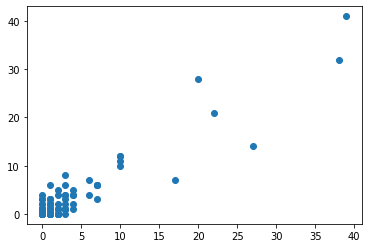

In [60]:
plt.scatter(medal_count["Gold"], medal_count["Silver"])